In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

In [3]:
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

In [4]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
df.loc[df.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [7]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

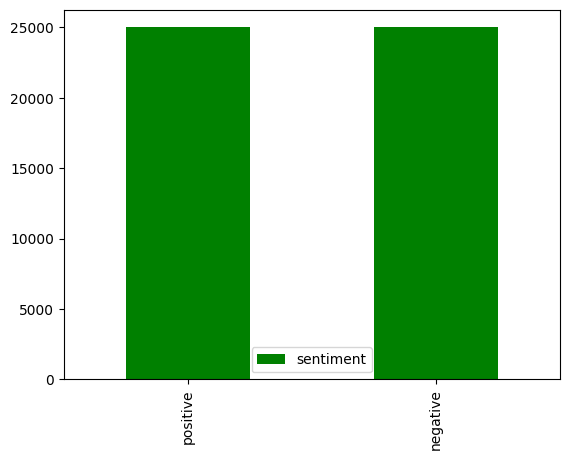

In [8]:
# Value count before dropping duplicate values
df['sentiment'].value_counts().plot(kind='bar',color='green')
plt.legend(loc='best')
plt.show()

In [9]:
# Summary of the dataset
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
# To check the datatypes of the columns present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
df.drop_duplicates(subset='review',inplace=True)

tot_rows=len(df)
print("Total rows after deleting duplicate rows are :",tot_rows)

Total rows after deleting duplicate rows are : 49582


In [12]:
df.reset_index(drop=True)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49577,I thought this movie did a down right good job...,positive
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49579,I am a Catholic taught in parochial elementary...,negative
49580,I'm going to have to disagree with the previou...,negative


In [13]:
df.shape

(49582, 2)

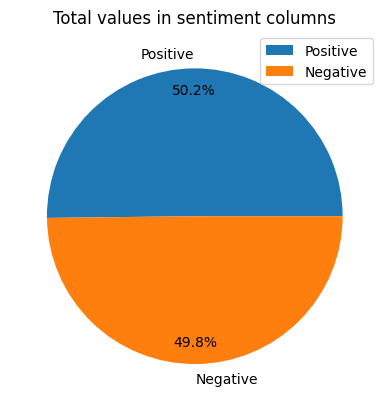

In [14]:
# Value count after dropping duplicate values
colors = ['#FF0000', '#0000FF']
count=df['sentiment'].value_counts()
plt.pie(count, labels=["Positive","Negative"],
        autopct='%1.1f%%', pctdistance=0.85)
plt.title("Total values in sentiment columns")
plt.legend()
plt.show()

In [15]:
# Value count after dropping duplicate values
df.sentiment.value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

In [16]:
# Convert the positive and negative value in form of 0s and 1s
# Here 0 represents negative value and 1 represents positive value
le = LabelEncoder()
df['sentiment']=le.fit_transform(df['sentiment'])
df.sentiment.value_counts()

1    24884
0    24698
Name: sentiment, dtype: int64

In [17]:
#Removing HTML Tags
def remove_html_tags(text):
    re_html = re.sub(r'<[^>]+>','',text)
    return re_html

print(f"Before removing HTML tags: {df['review'][1][:200]}")

df['review'] = df['review'].apply(remove_html_tags)

print(f"After removing HTML tags : {df['review'][1][:200]}")

Before removing HTML tags: A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece
After removing HTML tags : A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors


In [18]:
#Lowercasting
def convert_lowercase(column):
    column = column.str.lower()
    return column

print(f"Before applying lower casting: {df['review'][0][:10]}")

df['review'] = convert_lowercase(df['review'])

print(f"After applying lower casting : {df['review'][0][:10]}")

Before applying lower casting: One of the
After applying lower casting : one of the


In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
# Removing Stopwords
stopwords_english = stopwords.words('english')

def remove_stopwords(text):
    stop_words = nltk.corpus.stopwords.words("english")
    text = " ".join([word for word in text.split() if word not in stop_words])

    return text

print(f"Review before removing stop words : {df['review'][0]}")

df['review'] = df['review'].apply(remove_stopwords)

print(f"Review after removing stop words : {df['review'][0]}")

Review before removing stop words : one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fac

In [21]:
#Removing special characters

#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on review column

print(f"After removing special characters : {df['review'][0][:200]}")

df['review']=df['review'].apply(remove_special_characters)

print(f"After removing special characters : {df['review'][0][:200]}")

After removing special characters : one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid.
After removing special characters : one reviewers mentioned watching 1 oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show p


In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df = df.reset_index(drop=True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
def trainTestSplit(df):
    global X_train,X_test,y_train,y_test
    X_train, X_test, y_train, y_test = train_test_split(df['review'],df['sentiment'], test_size=0.2, random_state=42)
    return X_train,X_test,y_train,y_test

df2 = trainTestSplit(df)
df2

(7827     really liked movie the emporers new groove wat...
 4811     decided watch movie noted scariest movie ever ...
 35252    hard say going the lady shanghai film could wi...
 3446     scifi adventure best means worst agree stateme...
 24377    around late 1970s animator bluth frustrated ou...
                                ...                        
 11284    dictated thin experience of life industry cash...
 44732    classic case something never been gloria singl...
 38158    spoilers spoilersi saw movie last night screen...
 860      production quite surprise me absolutely love o...
 15795    real eye candy world made floating islands fly...
 Name: review, Length: 39665, dtype: object,
 29035    soul plane horrible attempt comedy appeal peop...
 43282    guest future tells fascinating story time trav...
 38461    national treasure 2004 thoroughly misguided ho...
 16000    ok first said wanted check whether movie avera...
 5245     always fan show grew me season 5 started see 

In [27]:
v=CountVectorizer()
x_train_cv = v.fit_transform(X_train.values)
x_train_cv

<39665x192070 sparse matrix of type '<class 'numpy.int64'>'
	with 4035893 stored elements in Compressed Sparse Row format>

In [28]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),                                                    #initializing the vectorizer
    ('random_forest', (RandomForestClassifier(n_estimators=50, criterion='entropy')))      #using the RandomForest classifier
])
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])

In [29]:
y_pred = clf.predict(X_test)
y_pred


array([0, 1, 0, ..., 0, 0, 0])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4939
           1       0.84      0.83      0.84      4978

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



In [31]:
dt= Pipeline([
    ('vectorizer', CountVectorizer()),                                                    #initializing the vectorizer
    ('random_forest', (DecisionTreeClassifier()))     #using the RandomForest classifier
])
dt.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('random_forest', DecisionTreeClassifier())])

In [32]:
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4939
           1       0.72      0.73      0.73      4978

    accuracy                           0.72      9917
   macro avg       0.72      0.72      0.72      9917
weighted avg       0.72      0.72      0.72      9917



In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr= Pipeline([
    ('vectorizer', CountVectorizer()),                                                    #initializing the vectorizer
    ('random_forest', (LogisticRegression(random_state=100,verbose=20)))   #using the RandomForest classifier
])
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  5.9min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  5.9min


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('random_forest',
                 LogisticRegression(random_state=100, verbose=20))])

In [35]:
lr.score(X_test,y_test)

0.8852475547040436

In [36]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.88      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



In [38]:
cm1 = confusion_matrix(y_test,y_pred)

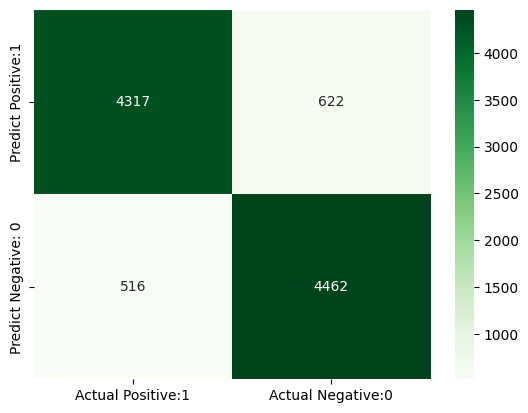

In [39]:
cm_matrix=pd.DataFrame(data=cm1, columns=['Actual Positive:1','Actual Negative:0'],index=['Predict Positive:1','Predict Negative: 0'])
sns.heatmap(cm_matrix,cmap='Greens',annot=True,fmt="d")
plt.show()

In [40]:
lr1 = pickle.dump(lr,open('logistic_regression_model.pkl','wb'))

In [41]:
clf1 = pickle.dump(clf,open('Random_forest_model.pkl','wb'))

In [42]:
dt1 = pickle.dump(dt,open('Decision_Tree_model.pkl','wb'))